In [1]:
import pandas as pd
import wrangle as wr
import summaries as s
from importlib import reload
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:,.2f}'.format



In [6]:
# preprocessing functions are below

In [2]:
df = wr.get_clean_data(start2018=True)
sdf = s.get_summary_df(df)
sdf = wr.add_date_features(sdf)

In [3]:
train, test = wr.split_data(df)

In [4]:
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]

In [7]:
#pd.concat([validate.tail(1), test.head(1)])

In [5]:
X_train_ts = train.purchase_amount.copy().resample('D').sum()
X_validate_ts = validate.purchase_amount.copy().resample('D').sum()
X_test_ts = test.purchase_amount.copy().resample('D').sum()

In [6]:
X_train = X_train_ts.to_frame()
X_validate = X_validate_ts.to_frame()
X_test = X_test_ts.to_frame()

In [7]:
X_validate.shape[0] == len(X_validate_ts)

True

In [29]:
scores = pd.DataFrame(columns=['model_name', 'train_score', 'validate_score'])

In [30]:
baseline = X_train_ts.mean()

In [31]:
baseline

654835.7355890411

In [32]:
def evaluate(target_name: str, model_name: str):
    RMSE_train = round(np.sqrt(mean_squared_error(X_train[target_name], predictions_train[model_name])))
    RMSE_validate = round(np.sqrt(mean_squared_error(X_validate[target_name], predictions_validate[model_name])))
    scores.loc[len(scores)] = [model_name, RMSE_train, RMSE_validate]
    
    # plot
    plt.figure(figsize = (12,4))
    plt.plot(train[target_name], label='Train', linewidth=1)
    plt.plot(validate[target_name], label='Validate', linewidth=1)
    plt.plot(predictions_train[model_name], label=model_name + '_train')
    plt.plot(predictions_validate[model_name], label=model_name + '_validate')
    plt.title(target_name)
    
    print(target_name, '-- RMSE train: {:.0f}'.format(RMSE_train))
    print(target_name, '-- RMSE validate: {:.0f}'.format(RMSE_validate))
    plt.show()

In [33]:
target = 'purchase_amount'

In [34]:
predictions_train = pd.DataFrame(index=X_train.index)
predictions_validate = pd.DataFrame(index=X_validate.index)
predictions_train['baseline'] = X_train_ts.mean()
predictions_validate['baseline'] = X_train_ts.mean()

purchase_amount -- RMSE train: 877795
purchase_amount -- RMSE validate: 810253


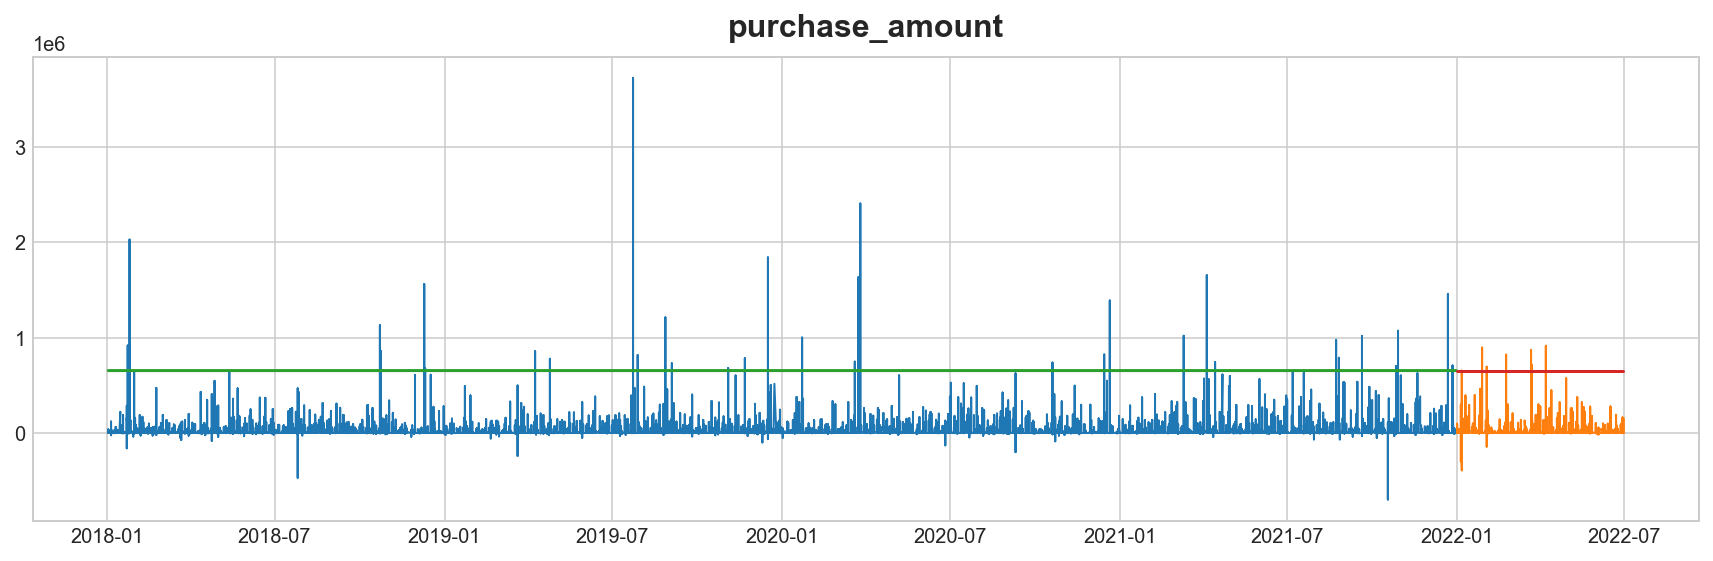

In [35]:
evaluate(target_name='purchase_amount', model_name='baseline')

### Moving Average

In [36]:
period = 3
ma3 = 'moving_average3'
rolling_amount = round(X_train.purchase_amount.rolling(period).mean()[-1], 2)
predictions_train[ma3] = rolling_amount
predictions_validate[ma3] = rolling_amount

purchase_amount -- RMSE train: 1063006
purchase_amount -- RMSE validate: 922232


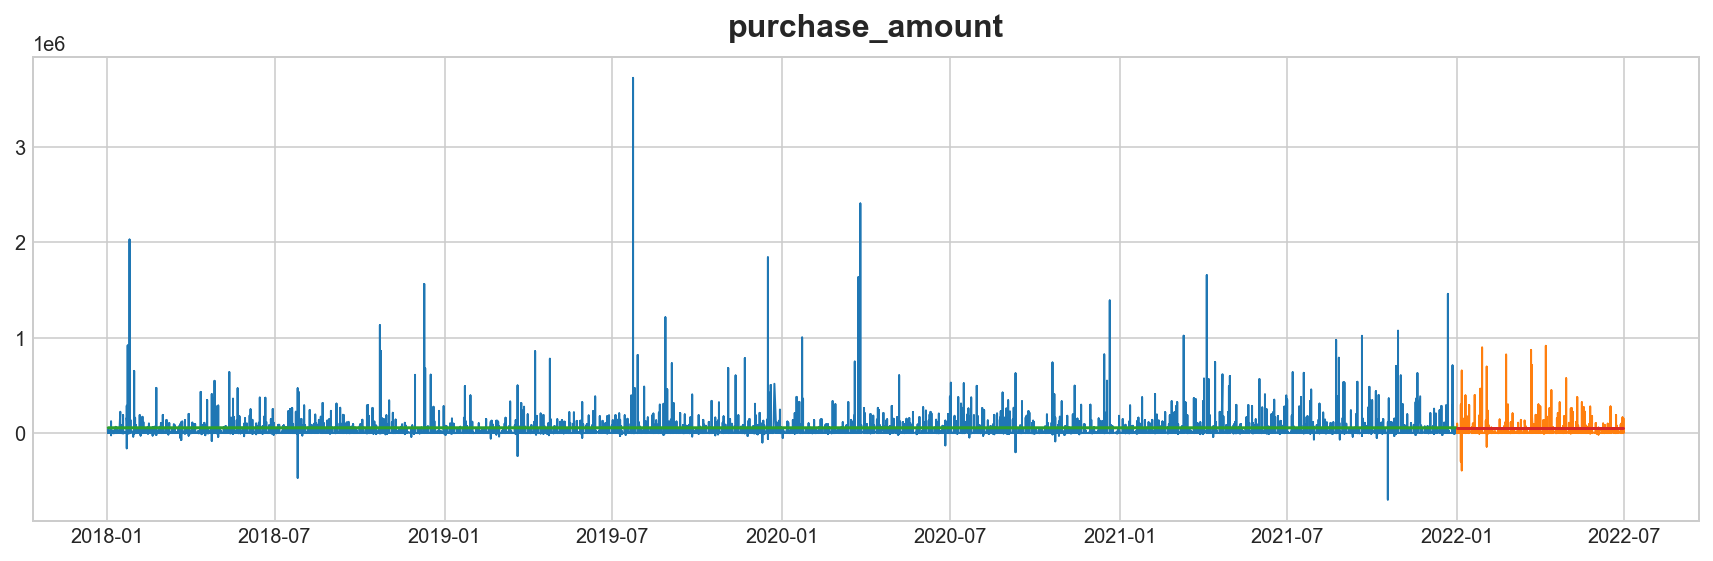

In [37]:
evaluate(target, ma3)

In [38]:
scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,moving_average3,1063006,922232


In [39]:
period = 7
ma7 = 'moving_average7'
rolling_amount = round(X_train.purchase_amount.rolling(period).mean()[-1], 2)
predictions_train[ma7] = rolling_amount
predictions_validate[ma7] = rolling_amount

purchase_amount -- RMSE train: 937941
purchase_amount -- RMSE validate: 821292


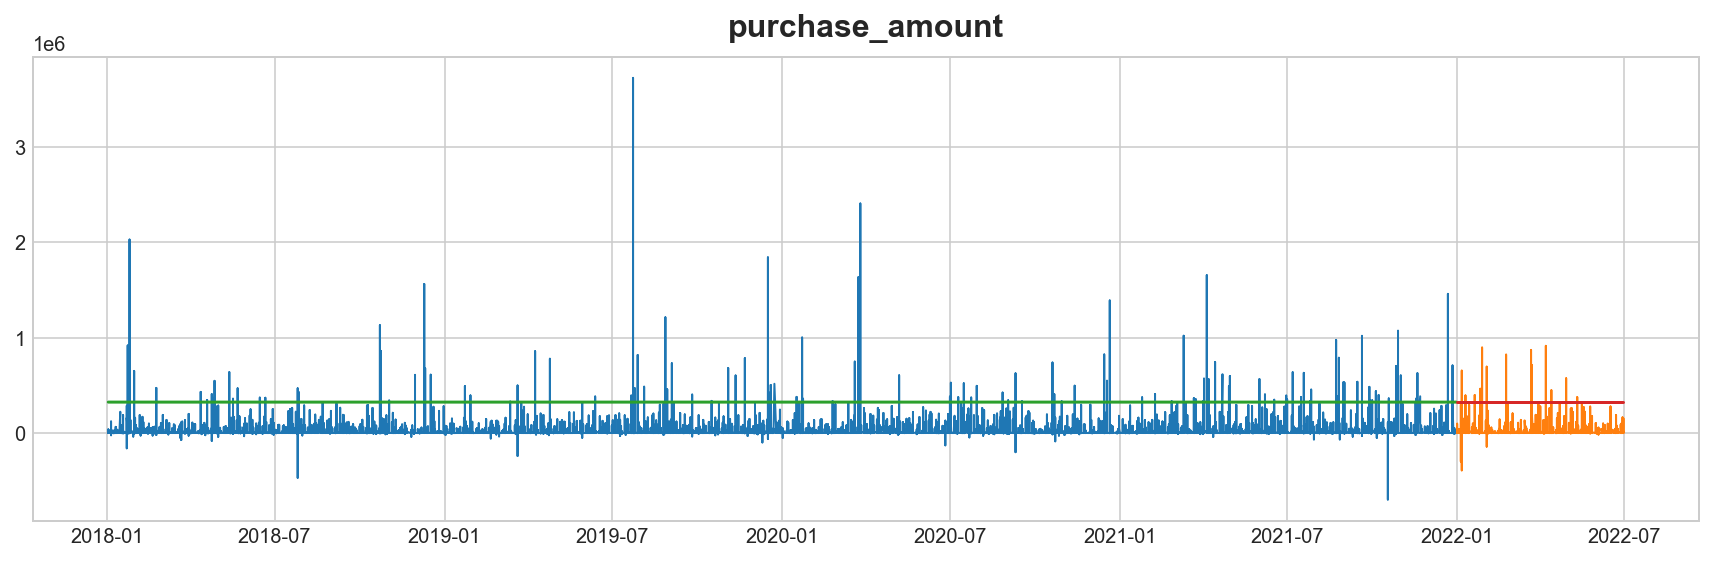

In [41]:
evaluate(target, ma7)

In [31]:
scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,moving_average3,1063006,922232
2,moving_average7,937941,821292


In [42]:
period = 28
ma28 = 'moving_average28'
rolling_amount = round(X_train.purchase_amount.rolling(period).mean()[-1], 2)
predictions_train[ma28] = rolling_amount
predictions_validate[ma28] = rolling_amount

purchase_amount -- RMSE train: 895879
purchase_amount -- RMSE validate: 799475


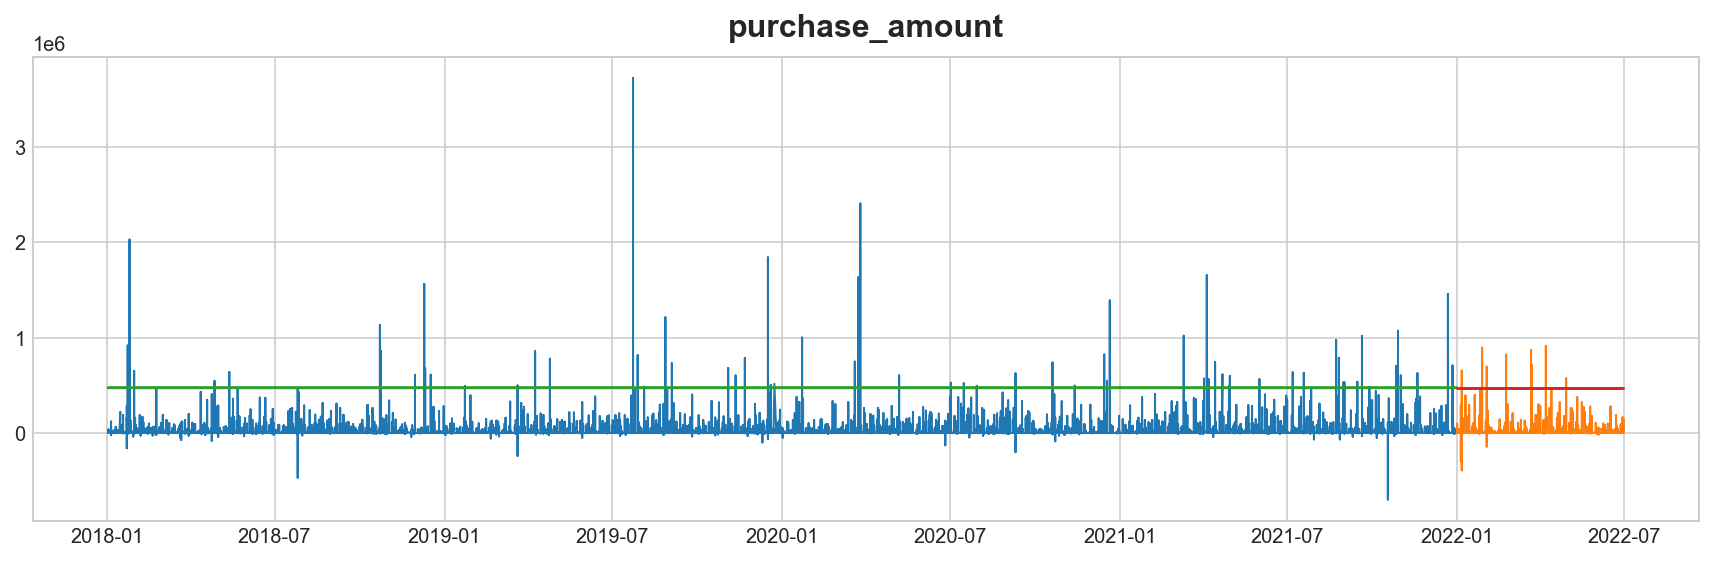

In [43]:
evaluate(target, ma28)

In [44]:
scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,moving_average3,1063006,922232
2,moving_average7,937941,821292
3,moving_average7,937941,821292
4,moving_average28,895879,799475


In [45]:
period = 52
ma52 = 'moving_average52'
rolling_amount = round(X_train.purchase_amount.rolling(period).mean()[-1], 2)
predictions_train[ma52] = rolling_amount
predictions_validate[ma52] = rolling_amount

purchase_amount -- RMSE train: 880974
purchase_amount -- RMSE validate: 800916


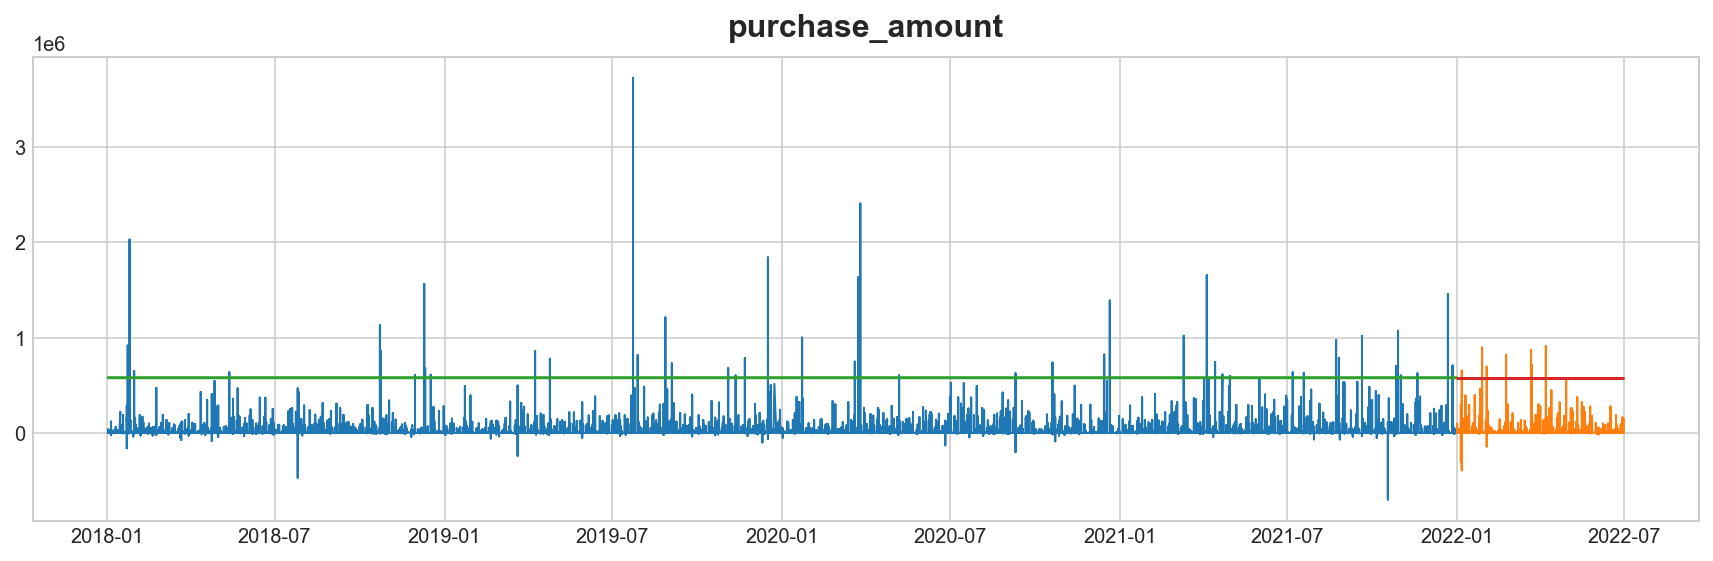

In [46]:
evaluate(target, ma52)

In [47]:
scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,moving_average3,1063006,922232
2,moving_average7,937941,821292
3,moving_average7,937941,821292
4,moving_average28,895879,799475
5,moving_average52,880974,800916


In [48]:
period = 90
ma90 = 'moving_average90'
rolling_amount = round(X_train.purchase_amount.rolling(period).mean()[-1], 2)
predictions_train[ma90] = rolling_amount
predictions_validate[ma90] = rolling_amount

purchase_amount -- RMSE train: 877849
purchase_amount -- RMSE validate: 811962


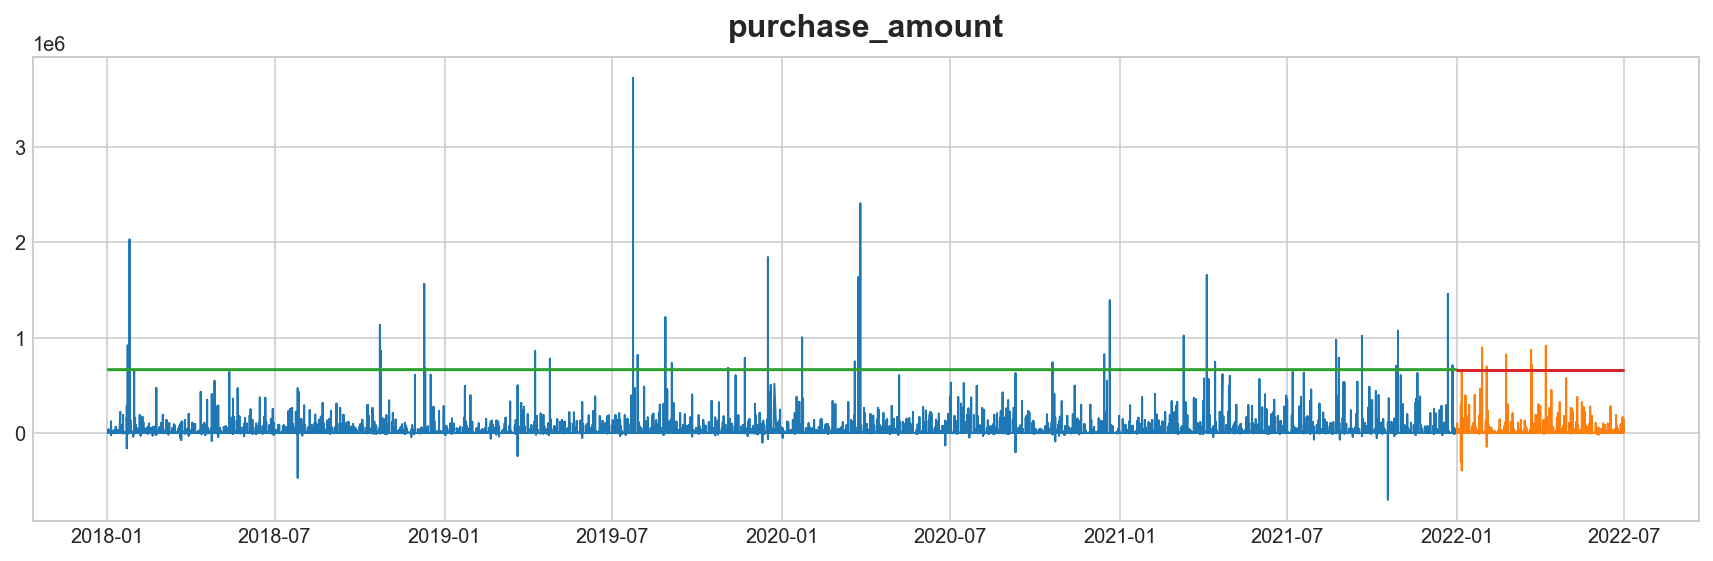

In [49]:
evaluate(target, ma90)

In [50]:
scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,moving_average3,1063006,922232
2,moving_average7,937941,821292
3,moving_average7,937941,821292
4,moving_average28,895879,799475
5,moving_average52,880974,800916
6,moving_average90,877849,811962
